# Nhập môn thống kê với Python
### Mô tả một tập dữ liệu
Giả sử rằng bạn chạy 100 m trong sáu lần, mỗi lần chạy bạn dùng đồng hồ đo lại thời gian chạy (tính bằng giây) và kết quả 6 lần chạy của bạn gồm sáu giá trị (còn gọi là quan sát). Một phương pháp được dùng trong thống kê là sử dụng bảng thu thập dữ liệu như sau:
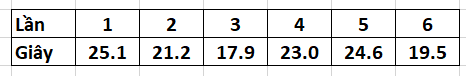
Để thấy được mối quan hệ giữa các dữ liệu một cách trực quan, chúng ta có thể tạo một biểu đồ cột 
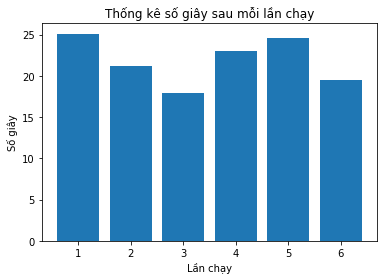
Biểu đồ cột trên có thể được tạo bằng cách dùng thư viện [matplotlib](https://matplotlib.org/) như sau:

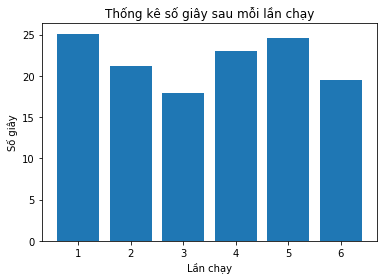

In [11]:
# Vẽ biểu đồ thống kê số giây sau mỗi lần chạy
from matplotlib import pyplot as plt
Lan_chay = [1,2,3,4,5,6]
So_giay = [25.1, 21.2, 17.9, 23.0, 24.6, 19.5]
xs = [i + 0.1 for i, _ in enumerate(Lan_chay)]
plt.bar(xs, So_giay)
plt.ylabel("Số giây")
plt.xlabel("Lần chạy")
plt.title("Thống kê số giây sau mỗi lần chạy")
plt.xticks([i + 0.1 for i, _ in enumerate(Lan_chay)], Lan_chay)
plt.show()

Từ bảng dữ liệu hay biểu đồ, chúng ta có thể suy ra một số thông tin đơn giản như lần chạy nào có số giây lớn nhất hay nhỏ nhất nhưng chúng ta vẫn cần biết nhiều hơn.
## Xu hướng tập trung (Central Tendencies)
Một trong những phương pháp đo lường phổ biến dùng trong thống kê là đo lường theo xu hướng tập trung dựa trên 3 tham số  là số trung bình (mean hay average), số trung vị (media) và số mode -  là số có tần suất xuất hiện nhiều nhất trong mẫu.
### Mean
Mean có thể được tính một cách đơn giản bằng tổng của tất cả các giá trị của dữ liệu trong mẫu chia cho kích thước mẫu.Hàm tính Mean của một mẫu có thể được định nghĩa đơn giản bằng Python như sau:

In [3]:
Lan_chay = [1,2,3,4,5,6]
So_giay = [25.1, 21.2, 17.9, 23.0, 24.6, 19.5]
# Định nghĩa hàm tính mean
def mean(mau):
    return sum(mau)/len(mau)
print(mean(So_giay)) # 21.88333333333333

21.88333333333333


### Median
Trong lý thuyết xác suất và thống kê, nếu m là số trung vị (Median) của một tập mẫu nào đó thì 1/2 số phần tử trong tập mẫu đó có giá trị nhỏ hơn hay bằng m và một nửa còn lại có giá trị bằng hoặc lớn hơn m.
Median được tính như sau: Sắp xếp dữ liệu và lấy giá trị ở giữa. Nếu số giá trị là một số chẳn thì median là trung bình của 2 giá trị ở giữa. Để hiểu hơn về trung vị chúng ta có thể xem xét hai tập mẫu sau:
S1 = {7, 3, 2, 4, 3}
S2 = {8, 7, 5, 6, 4,3}
Trước khi tính trung vị, chúng ta cần sắp xếp dữ liệu theo thứ tự tăng (hay giảm) dần. Tập S1 có thể được viết lại
S1 = {2,3,3,4,7}
Và S2 có thể được viết lại:
S2 = {3,4,5,6,7,8}
Như vậy Median(S1) = 3 và Median(S2) = (5+6)/2 = 5.5. Đoạn mã Python sau minh họa hàm tính Median:

In [5]:
S1 = [7, 3, 2, 4, 3]
S2 = [8, 7, 5, 6, 4, 3]
# Hàm tính Median của một tập mẫu
def median(v):
    n = len(v)
    # sắp xếp tập mẫu
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # nếu số phần tử của tập mẫu là lẻ thì Median là phần tử ở giữa sau khi 
        # tập mẫu được sắp xếp
        return sorted_v[midpoint]
    else:
        # nếu số phần tử của tập mẫu là chẵn thì Median là Median của hai phần tử
        # ở giữa sau khi tập mẫu được sắp xếp
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
print(median(S1)) # 3
print(median(S2)) # 5.5

3
5.5


### Quantile
Dạng tổng quát của Median là Quantile– là những giá trị (hay điểm cắt (cut points)) chia tập mẫu thành p phần có số phần tử bằng nhau. Khi đó ta có thể gọi các điểm này là p-quantiles. Median 2-quantiles. Một Quantile phổ biến khác dùng trong xác suất và thống kê gọi là Tứ phân vị (quartile) https://vi.wikipedia.org/wiki/T%E1%BB%A9_ph%C3%A2n_v%E1%BB%8B là 4-quantiles. Xem danh sách các quantiles tại https://en.wikipedia.org/wiki/Quantile 
Hàm Python sau sẽ định nghĩa một hàm quantile trả về một quantile theo tỉ lệ p:

In [2]:
S = [3, 6, 7, 8, 8, 9, 10, 13, 15, 16, 20]
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]
quantile(S, 0.1)

6

### Mode 
Mode là số có tần suất xuất hiện nhiều nhất trong tập mẫu. Xem xét các tập mẫu và Mode của chúng:
S1 = {1, 1, 3, 3, 3, 4}  -> Mode (S1) = 3 vì 3 xuất hiện nhiều nhất trong S1
S2 = {1, 2, 3} -> Mode(S2) = {1,2,3} vì các số 1,2,3 có số lần xuất hiện bằng nhau là 1 
S3 = {1, 2, 2, 1} -> Mode(S3) = {1,2} vì các số 1,2 có số lần xuất hiện bằng nhau là 2
Đoạn mã Python sau định nghĩa hàm mode trả về các phần tử Mode:

In [28]:
from collections import Counter
S1 = [1, 1, 3, 3, 3, 4]
S2 = [1, 2, 3]
S3 = [1, 2, 2, 1]
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
        if count == max_count]
    return 0
print(mode(S1)) # [3]
print(mode(S2)) # [1,2,3]
print(mode(S3))#[1,2]

[3]
[1, 2, 3]
[1, 2]


## Đo lường sự biến thiên của dữ liệu (Variation of Data)
Để đo lường sự biến thiên hay (thường so với giá trị trung bình) của dữ liệu người ta thường dùng các tham số Range (khoảng biến thiên), Interquartile Range (IQR – Khoảng tứ phân vị), Standard Deviation (độ lệch chuẩn), Variance (phương sai), Standard Error (sai số chuẩn).
### Range (Khoảng biến thiên) 
Được tính bằng cách lấy giá trị lớn nhất  trừ giá trị nhỏ nhất trong mẫu. Đoạn mã Python sau mô tả cách tính Range:

In [1]:
So_giay = [25.1, 21.2, 17.9, 23.0, 24.6, 19.5]
def data_range(x):
    return max(x) - min(x)
print(data_range(So_giay))

7.200000000000003


### Deviation (độ lệch)
Trong thống kê, khi muốn đo lường sự phân tán của dữ liệu so với giá trị trung tâm ta dùng khái niệm độ lệch (deviation). Giả sử ta sử dụng giá trị trung bình làm giá trị trung tâm, khi đó ta có tổng độ lệch của tất cả quan sát với giá trị trung bình trong mẫu có n giá trị là:
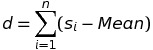
Vì các giá trị si có thể lớn, bằng hay nhỏ hơn Mean nên giá trị độ lệch mỗi lần quan sát sẽ có những giá trị âm, dương hay 0 và điều này sẽ dẫn đến kết quả tổng độ lệch d có thể bằng 0. Để tránh sự bất tiện này, chúng ta sẽ dùng giá trị tuyệt đối cho các độ lệch và cũng để không bị ảnh hưởng từ kích thước mẫu chúng ta sẽ dùng công thức tổng độ lệch như sau:
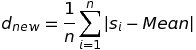
Tuy nhiên, vấn đề của giá trị tuyệt đối là tính không liên tục tại gốc tọa độ nên chúng ta sẽ sử dụng các công cụ khác để đo lường sự phân tán của dữ liệu như phương sai (variance) và độ lệch chuẩn (standard deviation).
### Phương sai (variance) và độ lệch chuẩn (standard deviation)
Trong xác suất thống kê có hai khái niệm cơ bản là population (tạm dịch: quần thể) và sample. Population là một tập hợp có số lượng lớn các cá thể (hay các tên gọi khác như phần tử, thành viên, v.v.) và một sample là một tập con hay tập mẫu của population. Để tiện việc minh họa, các khái niệm hay công thức trong bài viết này được áp dụng trên các sample thay vì population.
Vì hạn chế của giá trị tuyệt đối trong công thức tính độ lệch nên chúng ta có thể sử dụng khái niệm phương sai (variance) để đo lường sự phân tán của dữ liệu. Phương sai áp dụng cho tập mẫu (sample) gồm n phần tử gọi là phương sai mẫu (sample variance) có công thức như sau:
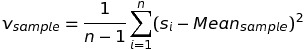
Lưu ý rằng, nếu phương sai áp dụng trên tập population có N cá thể thì công thức sẽ là:
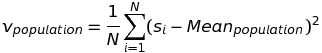
Vấn đề dùng (n-1) hay N liên quan đến các khái niệm ước lượng chệch (biased estimator) và ước lượng không chệch (unbiased estimator). Có thể tìm hiểu thêm tại https://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance
Phương sai là tham số rất tốt để đo lường sự biến thiên (hay phân tán) của dữ liệu trong mẫu vì nó đã quan tâm đến độ lệch của mỗi quan sát so với số trung bình, loại bỏ ảnh hưởng của kích thước mẫu và là hàm mượt. Tuy nhiên, điểm yếu của phương sai là không cùng đơn vị tính với Mean. Đơn vị tính của phương sai là bình phương của đơn vị tính của trung bình. Chẳn hạn, đơn vị tính của thời gian chạy trung bình là giây trong khí đó đơn vị tính của phương sai là giây bình phương. Để giải quyết vấn đề này, người ta lấy căn bậc 2 của phương sai và kết quả này gọi là độ lệch chuẩn (Standard Deviation). Công thức độ lệch chuẩn (áp dụng trên tập mẫu):

## Tính tương quan (Correlation)
Trong lý thuyết xác suất và thống kê, hệ số tương quan (Coefficient Correlation) cho biết độ mạnh của mối quan hệ tuyến tính giữa hai biến số ngẫu nhiên. Từ tương quan (Correlation) được thành lập từ Co- (có nghĩa "together") và Relation (quan hệ).
Hệ số tương quan giữa 2 biến có thể dương (positive) hoặc âm (negative). Hệ số tương quan dương cho biết rằng giá trị 2 biến tăng cùng nhau còn hệ số tương quan âm thì nếu một biến tăng thì biến kia giảm.
Một khái niệm quan trọng khác liên quan đến tính tương quan là hiệp phương sai (covariance). Nếu phương sai dùng để đo lường sự biến thiên của một biến ngẫu nhiên (hay dữ liệu trên một tập mẫu) thì hiệp phương sai đo lường sự biến thiên của hai biến ngẫu nhiên (hay dữ liệu trên hai tập mẫu cùng số cá thể). Công thức hiệp phương sai của hai biến (hay hai tập mẫu có cùng n cá thể) x, y:
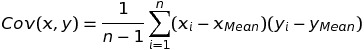
Công thức tính hệ số tương quan dựa trên hiệp phương sai như sau:
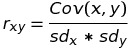
Với sdx và sdy tương ứng là độ lệch chuẩn của x và y.Đoạn mã Python dùng để tính hệ số tương quan r như sau:

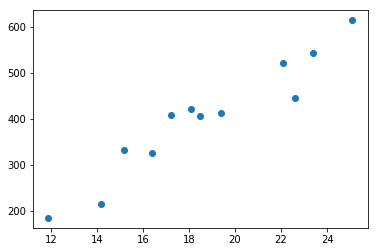

0.9575066230015952


In [3]:
import math
from matplotlib import pyplot as plt
Lan_chay = [1,2,3,4,5,6]
So_giay = [25.1, 21.2, 17.9, 23.0, 24.6, 19.5]
Temperature = [14.2, 16.4,11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2]
Ice_Cream_Sales = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]
# Tính tổng bình phương 
def dot(x,y):
    return sum(x_i * y_i
        for x_i, y_i in zip(x, y))
# Tính tổng bình phương 
def sum_of_squares(s):
    return sum(s_i * s_i
        for s_i, s_i in zip(s, s))
# Định nghĩa hàm tính mean
def mean(s):
    return sum(s)/len(s)
# tính độ lệch
def deviation(s):
    s_Mean = mean(s)
    return [s_i - s_Mean for s_i in s]
# tính phương sai mẫu
def variance(s):
    n = len(s)
    d = deviation(s)
    return sum_of_squares(d) / (n - 1)
# tính độ lệch chuẩn mẫu
def standard_deviation(s):
    return math.sqrt(variance(s))
# tính hiệp phương sai
def covariance(x, y):
    n = len(x)
    return dot(deviation(x), deviation(y)) / (n - 1)
# tính hệ số tương quan
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / (stdev_x * stdev_y)
    else:
        return 0 
plt.scatter(Temperature,Ice_Cream_Sales)
plt.show()
print(correlation(Temperature, Ice_Cream_Sales))

Xét một ví dụ về mối tương quan giữa nhiệt độ (Temprature) và doanh số bán kem (Ice Cream Sales) như sau:
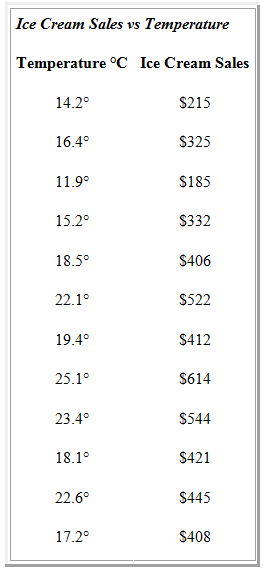
Chúng ta có thể thấy rõ hơn mối tương quan giữa hai biến này thông qua đồ thị sau:
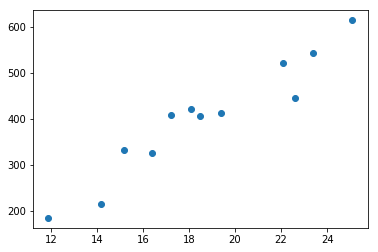
Qua đồ thị chúng ta thấy rằng, nhiệt độ càng cao thì doanh số bán kem càng tăng. Hệ số tương quan và đồ thị của hai biến nhiệt độ và doanh số bán kem có thể được mô tả qua các dòng mã Python:
```
Temperature = [14.2, 16.4,11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2]
Ice_Cream_Sales = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]
plt.scatter(Temperature,Ice_Cream_Sales)
plt.show()
print(correlation(Temperature, Ice_Cream_Sales)) # 0.9575
```
Hệ số tương quan sẽ xấp xỉ 0.9575.
## Kết luận
Qua bài viết này chúng ta đã tìm hiểu các khái niệm cơ bản nhất trong thống kê – một lĩnh vực có vai trò quan trọng trong Machine Learning. Bài tiếp theo chúng ta sẽ tìm hiểu các khái niệm trong một lĩnh vực có quan hệ vô cùng mật thiết với thống kê là xác suất và cũng có vai trò cực kỳ quan trọng trong Machine Learning.
### Tham khảo
* https://www.mv.helsinki.fi/home/jmisotal/BoS.pdf
* http://bis.net.vn/forums/t/489.aspx 
* https://statistics.laerd.com/statistical-guides/measures-of-spread-absolute-deviation-variance.php
